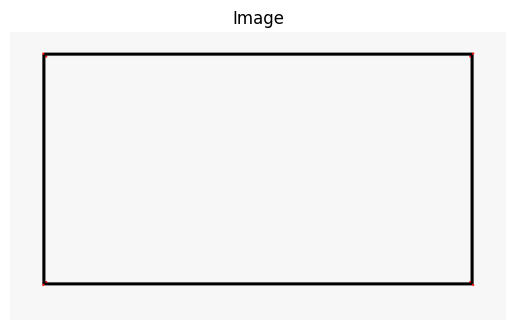

Total corners detected: 92


In [87]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('rec.png') 

# Convert the input image to grayscale
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Convert the datatype of operatedImage to float32
operatedImage = np.float32(operatedImage) 

# Apply the cv2.cornerHarris method 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

# Dilate the corners
dest = cv2.dilate(dest, None) 

# Mark the corners on the original image
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

# Count the number of corners
corner_count = np.sum(dest > 0.01 * dest.max())

# Display the image with corners using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.axis('off')
plt.show()

# Print the total number of corners detected
print("Total corners detected:", corner_count)


Adjusted K

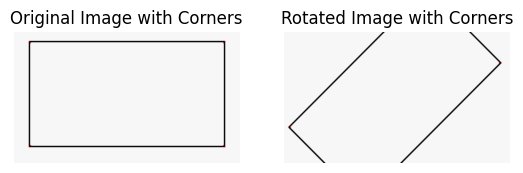

Total corners detected in original image: 36
Total corners detected in rotated image: 9

Corner coordinates in original image:
[40 60]
[40 61]
[40 62]
[ 40 858]
[ 40 859]
[ 40 860]
[41 60]
[41 61]
[41 62]
[ 41 858]
[ 41 859]
[ 41 860]
[42 60]
[42 61]
[42 62]
[ 42 858]
[ 42 859]
[ 42 860]
[469  60]
[469  61]
[469  62]
[469 858]
[469 859]
[469 860]
[470  60]
[470  61]
[470  62]
[470 858]
[470 859]
[470 860]
[471  60]
[471  61]
[471  62]
[471 858]
[471 859]
[471 860]

Corner coordinates in rotated image:
[389  17]
[389  18]
[389  19]
[390  17]
[390  18]
[390  19]
[391  17]
[391  18]
[391  19]


In [166]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Function to rotate an image by a specified angle around its center without cropping
def rotate_image(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated_image

# Load the input image
image = cv2.imread('rec.png') 

# Convert the input image to grayscale
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Convert the datatype of operatedImage to float32
operatedImage = np.float32(operatedImage) 

# Apply the cv2.cornerHarris method with adjusted k parameter
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.1)  # Adjust the k parameter here

# Dilate the corners
dest = cv2.dilate(dest, None) 

# Find coordinates of detected corners in the original image
corner_coordinates_original = np.argwhere(dest > 0.99 * dest.max())

# Mark the corners on the original image
image_with_corners = image.copy()
image_with_corners[dest > 0.01 * dest.max()]=[0, 0, 255] 

# Rotate the image by 45 degrees around its center without cropping
rotated_image = rotate_image(image, 45)

# Convert the rotated image to grayscale
rotated_operatedImage = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY) 

# Convert the datatype of operatedImage to float32
rotated_operatedImage = np.float32(rotated_operatedImage) 

# Apply the cv2.cornerHarris method with adjusted k parameter on rotated image
dest_rotated = cv2.cornerHarris(rotated_operatedImage, 2, 5, 0.1)  # Adjust the k parameter here

# Dilate the corners in the rotated image
dest_rotated = cv2.dilate(dest_rotated, None) 

# Find coordinates of detected corners in the rotated image
corner_coordinates_rotated = np.argwhere(dest_rotated > 0.99 * dest_rotated.max())

# Mark the corners on the rotated image
rotated_image_with_corners = rotated_image.copy()
rotated_image_with_corners[dest_rotated > 0.01 * dest_rotated.max()]=[0, 0, 255] 

# Display the original image with detected corners
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Corners')
plt.axis('off')

# Display the rotated image with detected corners
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image with Corners')
plt.axis('off')

plt.show()

# Print the total number of corners detected in both images
print("Total corners detected in original image:", len(corner_coordinates_original))
print("Total corners detected in rotated image:", len(corner_coordinates_rotated))

# Print the coordinates of the detected corners in both images
print("\nCorner coordinates in original image:")
for corner in corner_coordinates_original:
    print(corner)

print("\nCorner coordinates in rotated image:")
for corner in corner_coordinates_rotated:
    print(corner)


Shi-Tomasi

C:\Users\Asus\AppData\Local\Temp\ipykernel_14972\3372320168.py:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


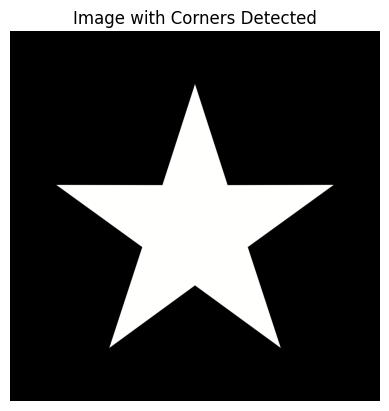

Total corners detected: 10


In [153]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('star2.jpg') 

# Convert the input image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Adjust the quality level threshold
quality_level = 0.155  # Adjust this value to control the threshold

# Detect corners using the Shi-Tomasi corner detector
corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=quality_level, minDistance=10)

# Convert corners to integers
corners = np.int0(corners)

# Draw circles around the detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

# Display the image with corners using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Corners Detected')
plt.axis('off')
plt.show()

# Print the total number of corners detected
corner_count = len(corners)
print("Total corners detected:", corner_count)
